# Decision Trees - Transparency                                                                

A20379025
YiChen,Hsueh

Data from :https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

There are 699 objects and 10 features in the dataset
By analyzing each feature of tumor, we can classify tumor well whether is benign or malignant in the future.

Attribute Information:
1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

## Step 1: import data

In [154]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('breast-cancer-wisconsin.data.csv')
df['Class'] = np.where(df['Class']==2, 0,1)

Y = df.iloc[:,10].values
df = df.drop('id',1)
df = df.drop('Class',1)
feature_name=list(df)
X = df.iloc[:,0:9].values

## Step 2: split data to train_test_set

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 0)


## Step 3: fit data to DecisionTree

### Depth = 1

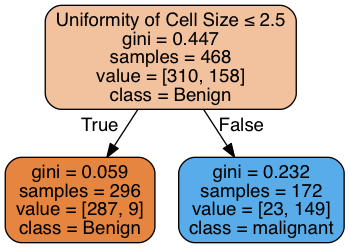

In [156]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)


import pydotplus 
from IPython.display import Image 
classname=['Benign','malignant']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_name,  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

#### Train Set Accuracy:

In [157]:

y_pred = clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_pred)

0.93162393162393164

#### Test Set Accuracy:

In [158]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.90909090909090906

### Depth = 2

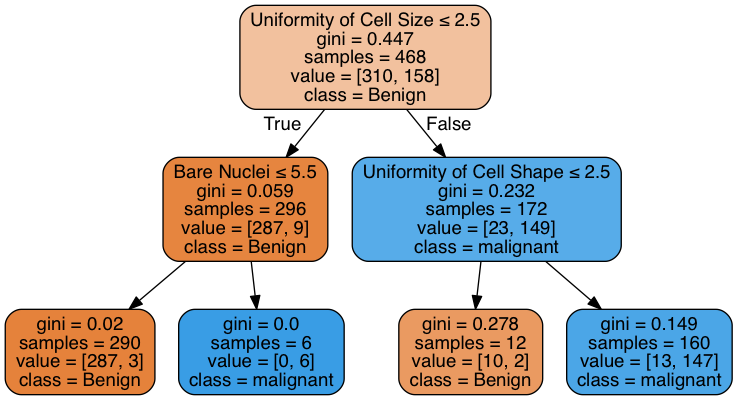

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)


import pydotplus 
from IPython.display import Image 
classname=['Benign','malignant']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_name,  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())



#### Train Set Accuracy:

In [160]:

y_pred = clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_pred)

0.96153846153846156

#### Test Set Accuracy:

In [161]:

y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.93073593073593075

### Depth = 3

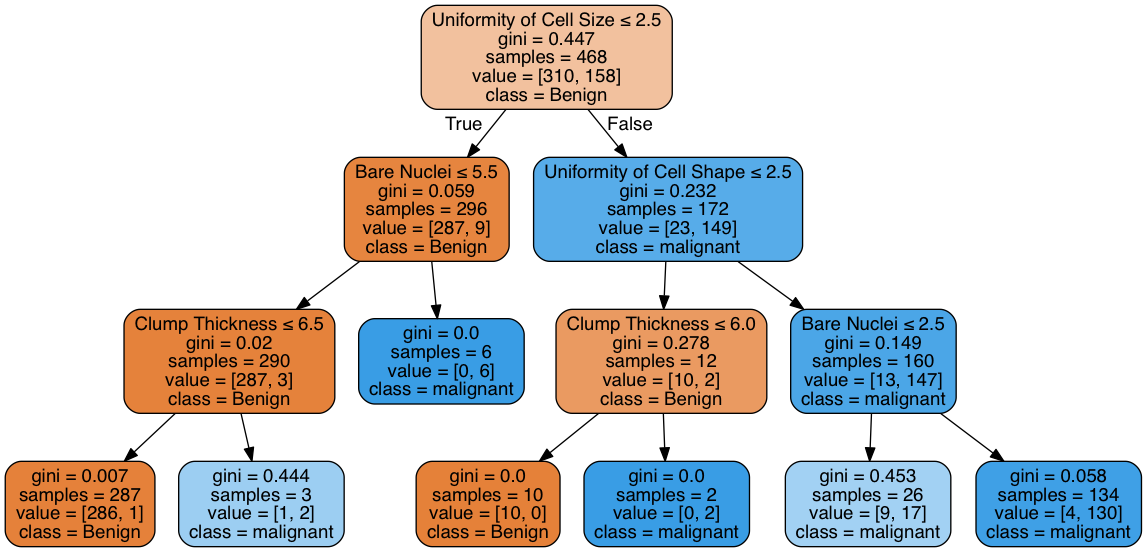

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)


import pydotplus 
from IPython.display import Image 
classname=['Benign','malignant']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_name,  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())




#### Train Set Accuracy:

In [163]:

y_pred = clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_pred)

0.96794871794871795

#### Test Set Accuracy:

In [164]:

y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.93073593073593075

### Depth = 4

In [165]:

clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, Y_train)


#### Train Set Accuracy:

In [166]:

y_pred = clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_pred)

0.9850427350427351

#### Test Set Accuracy:

In [167]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.93939393939393945

### Depth = 5

In [168]:

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)


#### Train Set Accuracy:

In [169]:

y_pred = clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_pred)

0.9850427350427351

#### Test Set Accuracy:

In [170]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.92640692640692646

### Depth = 6

In [171]:

clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, Y_train)

#### Train Set Accuracy:

In [172]:

y_pred = clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_pred)

0.99145299145299148

#### Test Set Accuracy:

In [173]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.93939393939393945

# Step 4: evaluate performance

Using Cross-Validatin-10 to evaluate Decision tree

## Train Set: Red Line
## Test Set: Green Line

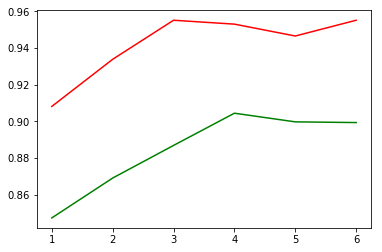

In [201]:
y=[]
x=[]


for k in range (1,3):
    y.append([])

for i in range (1,7):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, Y_train)
    scores = cross_val_score(clf, X_train, Y_train,None,'accuracy',cv=10)
    y[0].append(np.array(scores).mean())
    scores = cross_val_score(clf, X_test, Y_test,None,'accuracy',cv=10)
    y[1].append(np.array(scores).mean())
    x.append(i)


plt.plot(x,y[0],'r-',
         x,y[1],'g-')    

plt.show()

By observing the image of trees, "Uniformity of Cell Size" is on the top node of the tree, which means the most important feature to this database since it has the maximum gini. Then the tree grows the next level, although successfully classifies 287 T and 149 F objects based on  "Uniformity of Cell Size", but fails to classify 9+149 objects. So the tree keeps finding the second largest gini of features to be the next nodes.

Interestingly, there are three periods in the plot shown above. The first period is greedy growing up. The second period is stuck and declining. The final period is overfitting.
In the first period, the performace of Train set and Test set are better and better when max_depth becomes larger. However, in the second period, whether in Train set or Test set, the performance seems stuck in the same position, even decling in the depth 5. It represents most of objects are classified well. 
Take Train set in depth 4 for exmaple,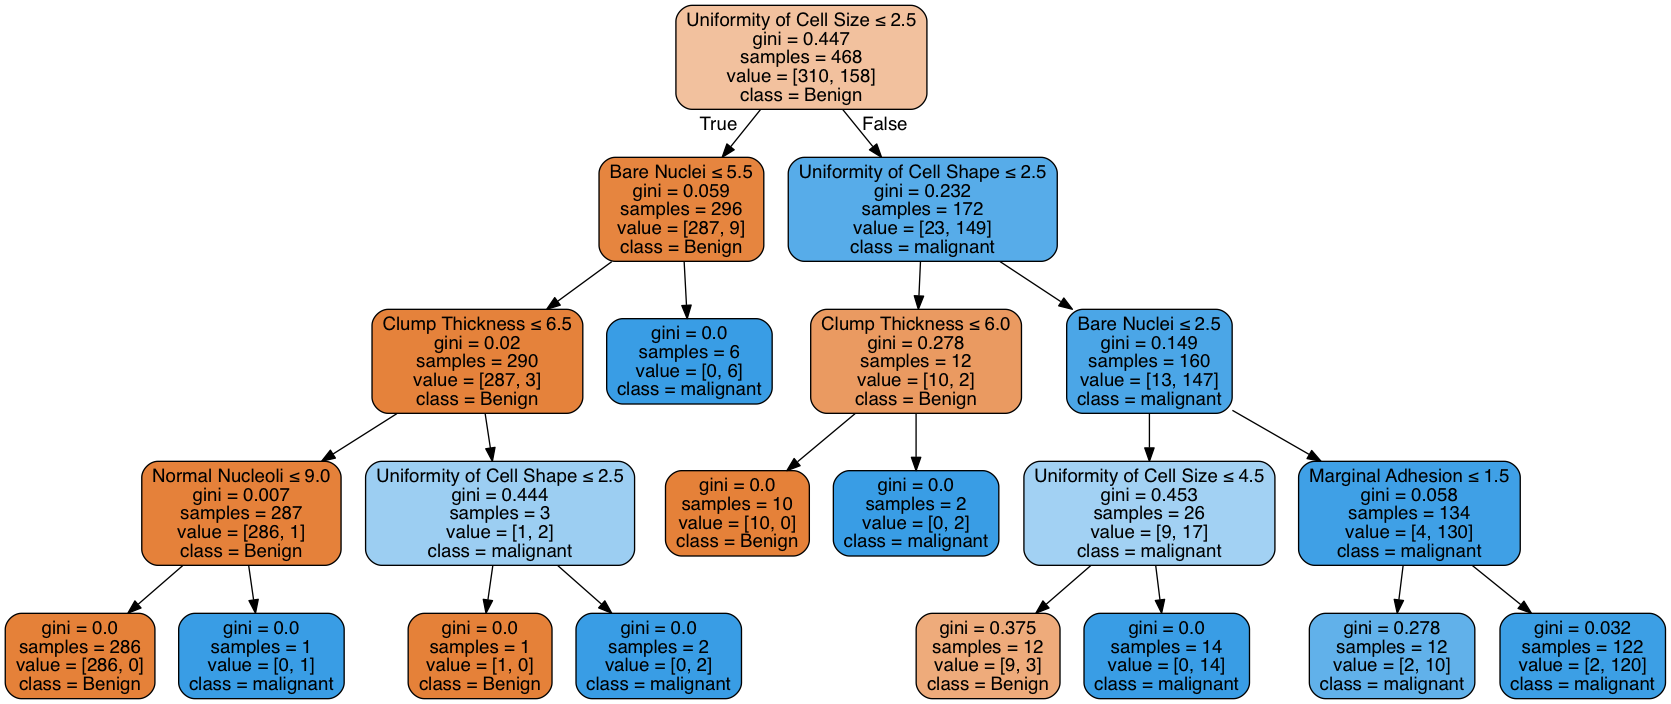
After splitting, the left-side tree finishes categorying objects, but the right-side tree still have 3+10+2 objects mislabeling.

In final period, the tree starts overfitting with the Train set, so the performance is growing up again. But in Test set, the performance is still stuck in the same position.

Besides, in order to be more transparent, it's really important to append the feature and class name on the image of tree. 
